# Logarithms & Exponentials


In [1]:
import math

for n in range(0,20):
    print(n, 2**n)
    

0 1
1 2
2 4
3 8
4 16
5 32
6 64
7 128
8 256
9 512
10 1024
11 2048
12 4096
13 8192
14 16384
15 32768
16 65536
17 131072
18 262144
19 524288


Values of x:  [0.1   0.101 0.102 ... 7.997 7.998 7.999]
Values of y:  [-3.32192809 -3.3075728  -3.29335894 ...  2.99945889  2.99963928
  2.99981965]


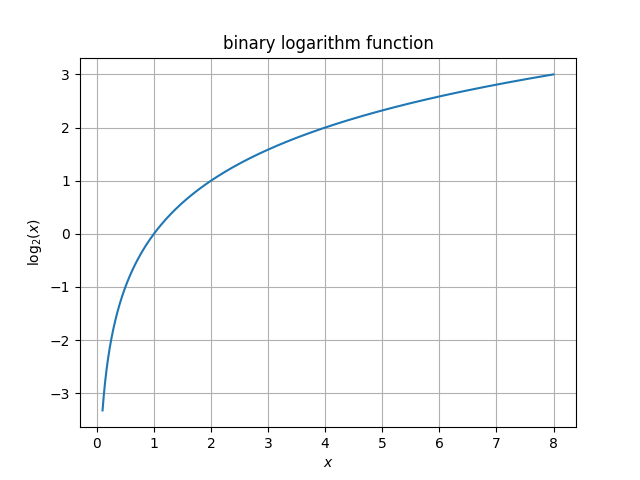

In [2]:
# adapted from https://www.askpython.com/python/examples/plot-mathematical-functions

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.1, 8, 0.001)
y = np.log2(x)
print('Values of x: ', x)
print('Values of y: ', y)
 
plt.plot(x, y)
 
plt.grid(True)
plt.title("binary logarithm function")
plt.xlabel(r"$x$")
plt.ylabel(r"$\log_2(x)$")
plt.show()

Values of x:  [-3.    -2.999 -2.998 ...  2.997  2.998  2.999]
Values of y:  [0.125      0.12508667 0.12517341 ... 7.98338175 7.98891733 7.99445674]


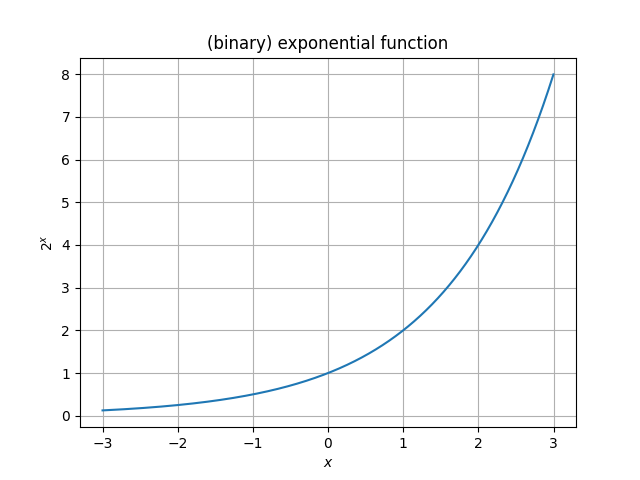

In [3]:
# adapted from https://www.askpython.com/python/examples/plot-mathematical-functions

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-3, 3, 0.001)
y = 2**x
print('Values of x: ', x)
print('Values of y: ', y)
 
plt.plot(x, y)
 
plt.grid(True)
plt.title("(binary) exponential function")
plt.xlabel(r"$x$")
plt.ylabel(r"$2^x$")
plt.show()

# Probability Distributions

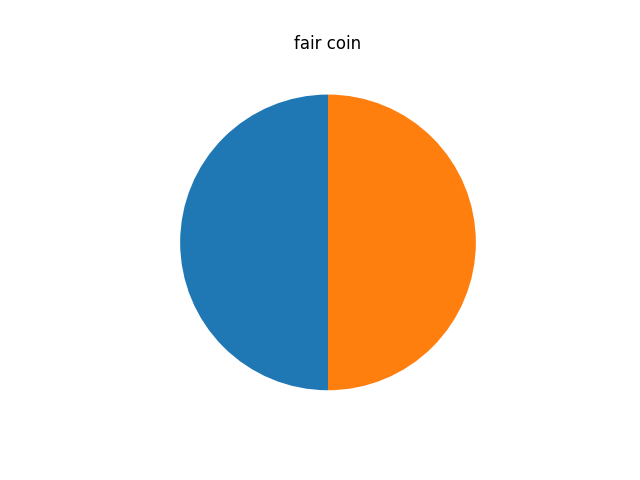

In [4]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([0.5, 0.5])

plt.pie(y, startangle = 90)
plt.title("fair coin")
plt.savefig("fair", transparent=True)
plt.show() 

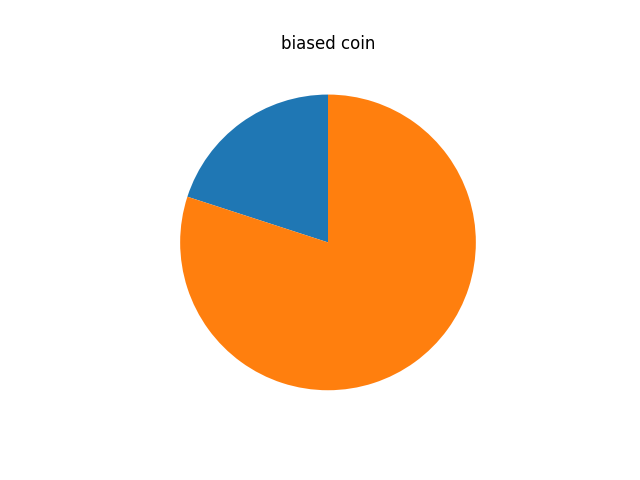

In [5]:
y = np.array([0.2, 0.8])
plt.pie(y, startangle = 90)
plt.title("biased coin")
plt.savefig("biased", transparent=True)
plt.show() 

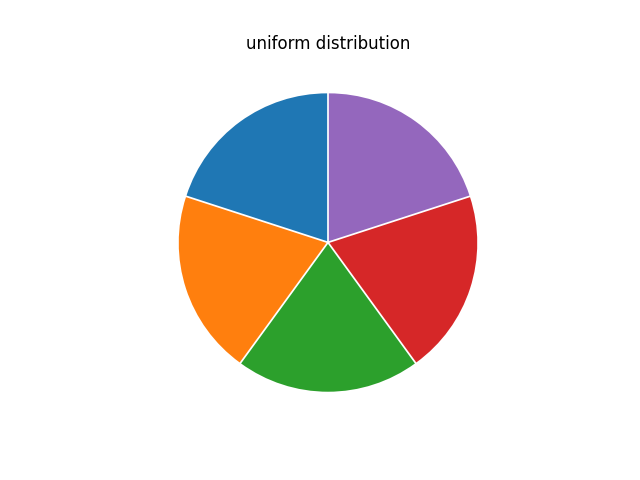

In [6]:
y = np.array([1/5, 1/5, 1/5, 1/5, 1/5])
myexplode = [0.01, 0.01, 0.01, 0.01, 0.01]
plt.pie(y, startangle = 90, explode = myexplode)
plt.title("uniform distribution")
plt.savefig("unif", transparent=True)
plt.show() 


In [7]:
import piplite
await piplite.install('ipywidgets')
from ipywidgets import interactive


In [8]:
# from https://www.geeksforgeeks.org/python-binomial-distribution/
from scipy.stats import binom

def plot_binomial(n=6, p=0.5):
    """Plot the probability mass of a binomial distribution"""

    # defining list of r values
    k_values = list(range(n + 1))
    # list of pmf values
    dist = [binom.pmf(k, n, p) for k in k_values ]
    # plotting the graph 
    plt.bar(k_values, dist)
    plt.xlabel(r"$k$")
    plt.ylabel(r"$\binom{n}{k} p^k (1-p)^{n-k}$")
    plt.title("binomial distribution")
    plt.show()

In [9]:
w=interactive(plot_binomial,n=(0,20),p=(0.0,1.0))
w

interactive(children=(IntSlider(value=6, description='n', max=20), FloatSlider(value=0.5, description='p', max…

In [16]:
def plot_binomial_pie(n=6, p=0.5):
    """Plot the probability mass of a binomial distribution"""

    # defining list of r values
    k_values = list(range(n + 1))
    # list of pmf values
    dist = [binom.pmf(k, n, p) for k in k_values ]
    # plotting the graph 
    plt.pie(dist, labels = k_values, startangle = 90)
    plt.title("binomial distribution")    
    plt.show()

In [17]:
w=interactive(plot_binomial_pie,n=(0,20),p=(0.0,1.0))
w

interactive(children=(IntSlider(value=6, description='n', max=20), FloatSlider(value=0.5, description='p', max…

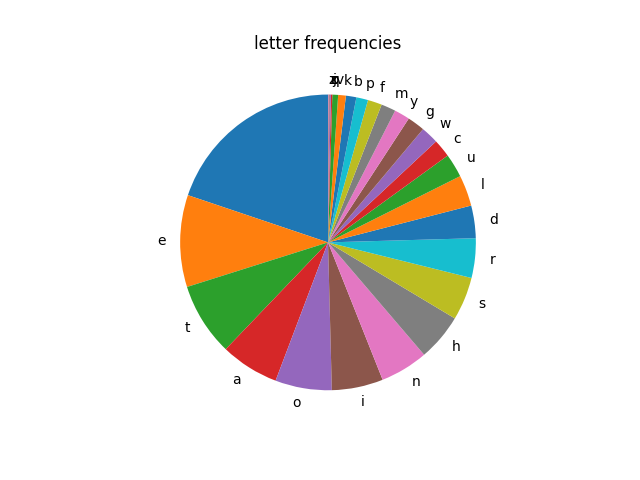

In [50]:
from collections import Counter
import math
import string
import re

## Alice's Adventures in Wonderland: https://www.gutenberg.org/files/11/11-0.txt

## parse input file, convert to lowercase, remove punctuation
with open("Alice_eng.txt") as f:
    Alice_data = f.read().lower()
    Alice_data = re.sub(r'([^a-z\s])+', ' ', Alice_data)  # strip everything but the letters
    Alice_data = re.sub(r'\n+', ' ', Alice_data)  # replace new lines with space
    Alice_data = re.sub(r'\s+', ' ', Alice_data)  # replace multiple spaces with a single space

with open("Alice_stripped.txt", 'w') as f:
    f.write(Alice_data)
    
count = Counter(Alice_data)
total_count = sum(count.values())

letters, letter_freq = zip(*count.most_common())
letter_dist = [x/total_count for x in letter_freq]

plt.pie(letter_freq, labels = letters, startangle = 90)
plt.title("letter frequencies")
plt.savefig("letterfreq", transparent=True)
plt.show()


In [19]:
import piplite
await piplite.install('seaborn')


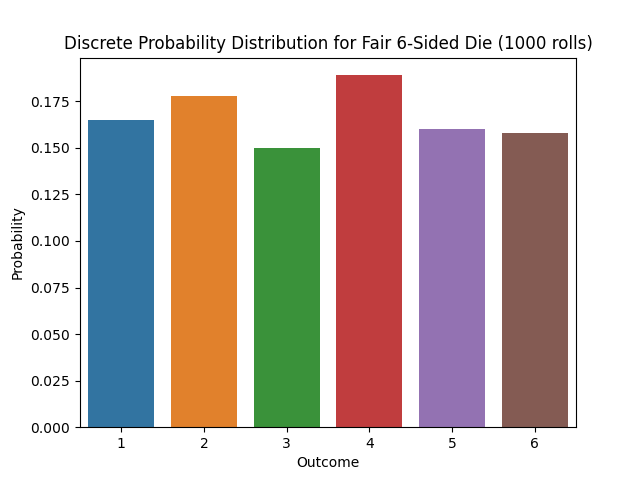

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

NUM_ROLLS = 1000

values = [1, 2, 3, 4, 5, 6]
sample = np.random.choice(values, NUM_ROLLS)

# Numpy arrays containing counts for each side
side, count = np.unique(sample, return_counts=True)
probs = count / len(sample)

# Plot the results
sns.barplot(x=side, y=probs)
plt.title(
    f"Discrete Probability Distribution for Fair 6-Sided Die ({NUM_ROLLS} rolls)")
plt.ylabel("Probability")
plt.xlabel("Outcome")
plt.show()

# Surprisal and Entropy

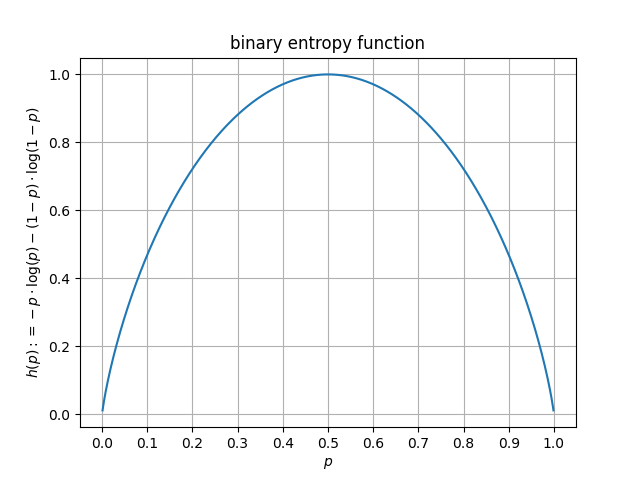

In [21]:
x = np.arange(0, 1, 0.001)
y = -x*np.log2(x) - (1-x)*np.log2(1-x)
plt.plot(x, y)
 
plt.grid(True)
plt.xticks([i/10.0 for i in range(0,11)])
plt.title("binary entropy function")
plt.xlabel(r"$p$")
plt.ylabel(r"$h(p) := -p \cdot \log(p) -(1-p) \cdot \log(1-p)$")
plt.savefig("binaryentropy", transparent=True)
plt.show()

In [22]:
def entropy(prob_dist):
    '''
    :param prob_dist: a list of non-negative floats that sum to 1
    :return: (base 2) Shannon entropy of prob_dist
    '''
    assert(all(p>=0 for p in prob_dist))
    assert(np.isclose(sum(prob_dist),1))

    # https://en.wikipedia.org/wiki/Entropy_%28information_theory%29
    # Shannon entropy H(p_i) = - sum_i p_i * log2(p_i)
    ent = 0.0
    for p in prob_dist:
        ent -= p * np.log2(p)

    return ent
    

In [26]:
def plot_binomial_pie(n=6, p=0.5):
    """Plot the probability mass of a binomial distribution"""

    # defining list of r values
    k_values = list(range(n + 1))
    # list of pmf values
    dist = [binom.pmf(k, n, p) for k in k_values ]
    # plotting the graph 
    plt.pie(dist, labels = k_values, startangle = 90)
    
    # computing the Shannon entropy
    ent = entropy(dist)
    plt.title("binomial distribution with entropy H={:.3f}".format(ent))    
    plt.show()

In [27]:
w=interactive(plot_binomial_pie,n=(0,20),p=(0.0,1.0))
w

interactive(children=(IntSlider(value=6, description='n', max=20), FloatSlider(value=0.5, description='p', max…

# Huffman coding

code from https://favtutor.com/blogs/huffman-coding and https://www.programiz.com/dsa/huffman-coding

In [28]:
from collections import Counter


class NodeTree(object):
    def __init__(self, left=None, right=None):
        self.left = left
        self.right = right

    def children(self):
        return self.left, self.right

    def __str__(self):
        return self.left, self.right


def huffman_code_tree(node, binString=''):
    '''
    Function to find Huffman Code
    '''
    if type(node) is str:
        return {node: binString}
    (l, r) = node.children()
    d = dict()
    d.update(huffman_code_tree(l, binString + '0'))
    d.update(huffman_code_tree(r, binString + '1'))
    return d


def make_tree(nodes):
    '''
    Function to make tree
    :param nodes: Nodes
    :return: Root of the tree
    '''
    while len(nodes) > 1:
        (key1, c1) = nodes[-1]
        (key2, c2) = nodes[-2]
        nodes = nodes[:-2]
        node = NodeTree(key1, key2)
        nodes.append((node, c1 + c2))
        nodes = sorted(nodes, key=lambda x: x[1], reverse=True)
    return nodes[0][0]

In [29]:
def huffman(input):
    count = Counter(input)
    # freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)
    node = make_tree(list(count.most_common()))
    encoding = huffman_code_tree(node)

    # compute Shannon entropy of frequency distribution for comparison
    total_count = sum(count.values())
    letters, freq = zip(*count.most_common())
    freq = [x / total_count for x in freq]
    ent = entropy(freq)

    return encoding, "".join([encoding[a] for a in input]), ent


In [25]:
input = 'BCAADDDCCACACAC'
len(input) * 8, len(huffman(input)[1]), huffman(input)[2] * len(input)

(120, 28, 26.72905595320056)

In [151]:
input = data
len(input), len(input) * 8, len(huffman(input)[1]), huffman(input)[2] * len(input), huffman(input)[2]

(123606, 988848, 519188, 515778.37541173544, 4.1727616411156045)

In [154]:
46156*8

369248

In [174]:
letter_samples = "".join(np.random.choice(letters, size=123606, p=letter_dist))
input = letter_samples
len(input), len(input) * 8, len(huffman(input)[1]), huffman(input)[2] * len(input), huffman(input)[2]

(123606, 988848, 519293, 515703.54280363227, 4.172156228691425)

In [175]:
with open("letter_samples.txt", 'w') as f:
    f.write(letter_samples)


In [176]:
73852 *8

590816

In [47]:
list(letters), letter_dist

([' ',
  'e',
  't',
  'a',
  'o',
  'i',
  'n',
  'h',
  's',
  'r',
  'd',
  'l',
  'u',
  'c',
  'w',
  'g',
  'y',
  'm',
  'f',
  'p',
  'b',
  'k',
  'v',
  'j',
  'q',
  'x',
  'z'],
 [0.19825388691777313,
  0.1004728515739017,
  0.07972316453807785,
  0.063883609757996,
  0.06181447872816548,
  0.056106531059667515,
  0.05238987877097508,
  0.05141693314566293,
  0.04722678065265193,
  0.0432377035888721,
  0.03557737836558107,
  0.03387796667336918,
  0.025925757762484514,
  0.019672960543811742,
  0.019303241206193124,
  0.019160542514480672,
  0.01690330866375648,
  0.015982253471794307,
  0.015463349138294492,
  0.01282990964578293,
  0.011402922728658439,
  0.0084192228110345,
  0.006285228739516511,
  0.0015307677838244547,
  0.0014464458296307347,
  0.0011740210545433318,
  0.0005189043334998152])

In [51]:
Alice_data[:900]

' the project gutenberg ebook of alice s adventures in wonderland by lewis carroll this ebook is for the use of anyone anywhere in the united states and most other parts of the world at no cost and with almost no restrictions whatsoever you may copy it give it away or re use it under the terms of the project gutenberg license included with this ebook or online at www gutenberg org if you are not located in the united states you will have to check the laws of the country where you are located before using this ebook title alice s adventures in wonderland author lewis carroll release date january ebook most recently updated october language english character set encoding utf produced by arthur dibianca and david widger start of the project gutenberg ebook alice s adventures in wonderland illustration alice s adventures in wonderland by lewis carroll the millennium fulcrum edition contents c'

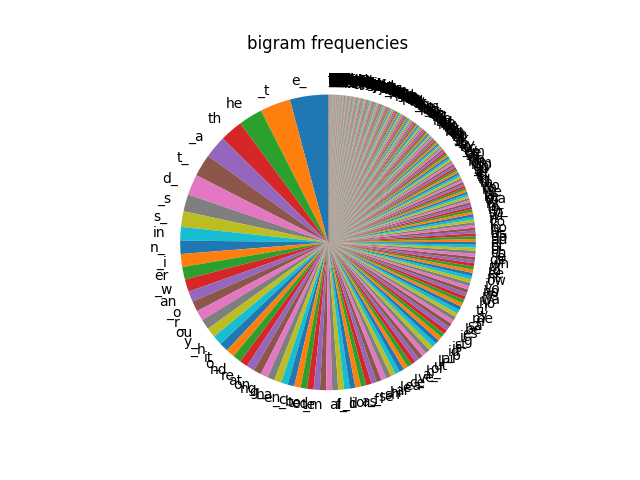

In [52]:
# count bigrams

# from https://www.codespeedy.com/compute-bigrams-frequency-in-a-string-in-python/
bigram_count = Counter(Alice_data[i:i+2] for i in range(len(Alice_data)-1))
total_count = sum(bigram_count.values())

bigrams, bigram_freq = zip(*bigram_count.most_common())
bigram_dist = [x / total_count for x in bigram_freq]

bigram_labels = tuple(bigram.replace(' ', '_') for bigram in bigrams)   # to increase readability
plt.pie(bigram_freq, labels=bigram_labels, startangle=90)
plt.title("bigram frequencies")
plt.savefig("bigramfreq", transparent=True)
plt.show()

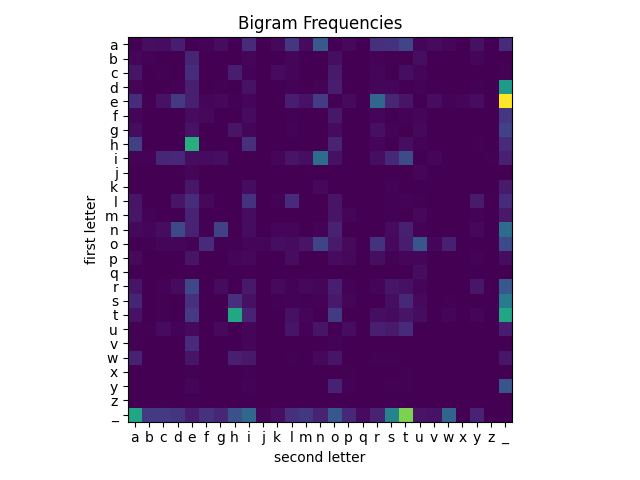

In [54]:
first_letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ']
second_letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ']

bigram_data = np.zeros( (len(first_letters),len(second_letters)), dtype=float)
col = 0
for fl in first_letters:
    row = 0
    for sl in second_letters:
        bigram_data[col, row] = bigram_count[fl+sl] / total_count
        row += 1
    col += 1

fig, ax = plt.subplots()
im = ax.imshow(bigram_data)

letter_labels = [x.replace(' ', '_') for x in first_letters]

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(first_letters)), labels=letter_labels)
ax.set_yticks(np.arange(len(second_letters)), labels=letter_labels)

plt.ylabel("first letter")
plt.xlabel("second letter")
ax.set_title("Bigram Frequencies")
fig.tight_layout()
plt.savefig("bigramfreq2", transparent=True)
plt.show()

# TODO: make different-sized squares instead, like in 
# https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec